In [1]:
import graphlab
import graphlab.aggregate as agg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loadPath = 'E:/celtraMiningFrik/'
savePath = loadPath

#Prepare data

prepare data based on feature analysis

In [36]:
def prepareData(data, perct, isTestDataset = False):
    
    if not isTestDataset:   
        data['ADLOADINGTIME']=data['ADLOADINGTIME'].astype(float)
        print(np.percentile(data['ADLOADINGTIME'],perct))
        if perct < 100:
            data = data[data['ADLOADINGTIME']<np.percentile(data['ADLOADINGTIME'],perct)] 
            
    #convert to int types
    data['GEOIP_LAT'] = data['GEOIP_LAT'].apply(lambda x: '0' if x=='null' else x)
    data['GEOIP_LAT']=data['GEOIP_LAT'].astype(float)
    data['GEOIP_LNG'] = data['GEOIP_LNG'].apply(lambda x: '0' if x=='null' else x)
    data['GEOIP_LNG']=data['GEOIP_LNG'].astype(float)
    data['UA_MOBILEDEVICE'] = data['UA_MOBILEDEVICE'].apply(lambda x: '0' if x=='null' else x)
    data['UA_MOBILEDEVICE']=data['UA_MOBILEDEVICE'].astype(int)    
    data['TIMESTAMP']=data['TIMESTAMP'].astype(int)
    data['HOSTWINDOWHEIGHT'] = data['HOSTWINDOWHEIGHT'].apply(lambda x: '0' if x=='null' else x)
    data['HOSTWINDOWHEIGHT']=data['HOSTWINDOWHEIGHT'].astype(int)
    data['HOSTWINDOWWIDTH'] = data['HOSTWINDOWWIDTH'].apply(lambda x: '0' if x=='null' else x)
    data['HOSTWINDOWWIDTH']=data['HOSTWINDOWWIDTH'].astype(int)
    data['TOPMOSTREACHABLEWINDOWHEIGHT'] = data['TOPMOSTREACHABLEWINDOWHEIGHT'].apply(lambda x: '0' if x=='null' else x)
    data['TOPMOSTREACHABLEWINDOWHEIGHT']=data['TOPMOSTREACHABLEWINDOWHEIGHT'].astype(int)
    data['TOPMOSTREACHABLEWINDOWWIDTH'] = data['TOPMOSTREACHABLEWINDOWWIDTH'].apply(lambda x: '0' if x=='null' else x)
    data['TOPMOSTREACHABLEWINDOWWIDTH']=data['TOPMOSTREACHABLEWINDOWWIDTH'].astype(int)


    data['TOPMOSTREACHABLEWINDOWAREA'] = data['TOPMOSTREACHABLEWINDOWWIDTH']*data['TOPMOSTREACHABLEWINDOWHEIGHT'];
    
    data['GEOIP_COUNTRY'] = data['GEOIP_COUNTRY'] + '_' + data['GEOIP_REGION'] 
    data['GEOIP_COUNTRY'] = data['GEOIP_COUNTRY'].apply(lambda x: x if 'United States' in x.split('_')[0] else x.split('_')[0])

    data['ERRORSJSON'] = data['ERRORSJSON'].apply(lambda x: x.replace('"',''))
    data['FILESJSON'] = data['FILESJSON'].apply(lambda x: x.replace('"',''))
    
    def extractImageSize(sIn):
        sIn = sIn.replace('[','')
        sIn = sIn.replace('}','')
        sIn = sIn.replace(']','')
        sIn = sIn.replace('{type:image,size:','')
        numberList = [int(s) for s in sIn.split(',') if s.isdigit()]
        if len(numberList) == 0:
            numberList = 0
        return np.sum(numberList)
    
    def extractVideoSize(sIn):
        sIn = sIn.replace('[','')
        sIn = sIn.replace('}','')
        sIn = sIn.replace(']','')
        sIn = sIn.replace('{type:video,size:','')
        numberList = [int(s) for s in sIn.split(',') if s.isdigit()]
        if len(numberList) == 0:
            numberList = 0
        return np.sum(numberList)

    data['FILESJSON_IMGSIZE'] = data['FILESJSON'].apply(extractImageSize)
    data['FILESJSON_VIDSIZE'] = data['FILESJSON'].apply(extractVideoSize)

    data['COMBINEDID'] = data['ACCOUNTID']+data['CAMPAIGNID']+data['CREATIVEID']
    data['COMBINEDEXTERNALID'] = data['EXTERNALPLACEMENTID']+data['EXTERNALSITEID']+data['EXTERNALSUPPLIERID']    

    data['PLATFORMCOMBINED'] = data['PLATFORM']+data['PLATFORMVERSION']
    data['PLATFORMCOMBINED'] = data['PLATFORMCOMBINED'].apply(lambda x : x.replace('null', ''))
    data['PLATFORMCOMBINED'] = data['PLATFORMCOMBINED'].apply(lambda x : 'NA' if x == '' else x)
    
    data['UA_OSCOMB'] = data['UA_OS']+data['UA_OSVERSION']
    

    data['INTENDENTISACTUALDEVICETYPE'] = data['INTENDEDDEVICETYPE']==data['ACTUALDEVICETYPE']
    data['PLATFORMCOMBINEDISOSCAOMB'] = data['PLATFORMCOMBINED']==data['UA_OSCOMB']

    
    # remove unneeded columns
    
    #data.remove_columns(['UA_OS', 'UA_OSVERSION']);
    #data.remove_columns(['PLATFORM','PLATFORMVERSION']);
    #data.remove_columns(['UA_PLATFORM','UA_PLATFORMVERSION']);
    #data.remove_columns(['CDNNAME','UA_DEVICETYPE','ACTUALDEVICETYPE']);
    #data.remove_column('EXTERNALPLACEMENTID');
    #data.remove_column('EXTERNALSITEID');
    #data.remove_column('EXTERNALSUPPLIERID');
    #data.remove_column('ACCOUNTID');
    #data.remove_column('CAMPAIGNID');
    #data.remove_column('CREATIVEID');
    #data.remove_column('TOPMOSTREACHABLEWINDOWWIDTH');
    #data.remove_column('TOPMOSTREACHABLEWINDOWHEIGHT');
    #data.remove_column('HOSTWINDOWWIDTH');
    #data.remove_column('HOSTWINDOWHEIGHT');
    #data.remove_column('DEVICEORIENTATION');
    #data.remove_column('UA_MOBILEDEVICE');
    #data.remove_column('EXTERNALCREATIVEID');
    #data.remove_column('NETWORKTYPE');
    #data.remove_column('GEOIP_TIMEZONE');
    #data.remove_column('GEOIP_METROCODE');
    #data.remove_column('GEOIP_AREACODE');
    #data.remove_column('GEOIP_CITY');
    #data.remove_column('GEOIP_DMACODE');
    #data.remove_column('GEOIP_REGION');
    
    return data

#Load train data

In [37]:
fileName = loadPath + 'ccdm_large.tsv'
sep = '\t'
perct = 95.25

train_data = graphlab.SFrame.read_csv(fileName,sep,column_type_hints=str);
train_data = prepareData(train_data, perct)

Read 77543 lines. Lines per second: 72601.7

Read 450314 lines. Lines per second: 74637.5

Read 814669 lines. Lines per second: 72391.6

Read 1106643 lines. Lines per second: 67606.3

Read 1406571 lines. Lines per second: 65748.4

Read 1780919 lines. Lines per second: 66453.4

Read 2139243 lines. Lines per second: 65752.3

Finished parsing file E:\celtraMiningFrik\ccdm_large.tsv

Parsing completed. Parsed 2450000 lines in 37.7812 secs.

19.704


In [4]:
train_data.show()

Canvas is accessible via web browser at the URL: http://localhost:1214/index.html
Opening Canvas in default web browser.


#Load validation data

In [14]:
fileName = loadPath + 'ccdm_medium.tsv'
sep = '\t'
perct = 94.40

val_data = graphlab.SFrame.read_csv(fileName,sep,column_type_hints=str);
val_data = prepareData(val_data, perct)

Finished parsing file E:\celtraMiningFrik\ccdm_medium.tsv

Parsing completed. Parsed 49000 lines in 0.578033 secs.

19.770392


In [21]:
val_data.show()

Canvas is accessible via web browser at the URL: http://localhost:44330/index.html
Opening Canvas in default web browser.


#Model training

###selected features

In [ ]:
features = ['COMBINEDID', 'COMBINEDEXTERNALID', 'CREATIVETYPE', 'PLACEMENTID', 'TIMESTAMP',
'SDK', 'EXTERNALADSERVER',
'PLATFORMCOMBINED', 'UA_HARDWARETYPE', 'UA_VENDOR', 'UA_MODEL', 'UA_BROWSER', 'UA_BROWSERVERSION', 'TOPMOSTREACHABLEWINDOWAREA',
 'FILESJSON', 'ERRORSJSON', 'FILESJSON_IMGSIZE', 'FILESJSON_VIDSIZE'
]

###Random forest regression

In [9]:
modelName = 'RFReg'

In [213]:
model = graphlab.random_forest_regression.create(train_data, target='ADLOADINGTIME',validation_set=val_data,
                                           max_iterations=25, features = features,
                                           max_depth =  50, row_subsample=0.9, column_subsample = 0.6)

Random forest regression:

--------------------------------------------------------

Number of examples          : 2333619

Number of features          : 21

Number of unpacked features : 21

+-----------+--------------+--------------------+---------------+----------------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse | Validation-max_error | Validation-rmse |

+-----------+--------------+--------------------+---------------+----------------------+-----------------+

| 1         | 34.064948    | 18.963999          | 2.907104      | 18.665001            | 2.991621        |

| 2         | 50.771904    | 18.329639          | 2.772852      | 17.165304            | 2.867640        |

| 3         | 69.182957    | 18.323490          | 2.729117      | 17.154444            | 2.829122        |

| 4         | 87.844024    | 18.319092          | 2.708905      | 17.194712            | 2.812213        |

| 5         | 152.206706   | 18.351311          | 2.653379      | 17.304691            | 2.758419        |

| 6         | 219.927579   | 18.055981          | 2.616762      | 17.206846            | 2.719585        |

| 7         | 280.387037   | 17.879173          | 2.592400      | 17.169729            | 2.695739        |

| 8         | 337.114282   | 17.884960          | 2.574719      | 17.184301            | 2.679281        |

+-----------+--------------+--------------------+---------------+----------------------+-----------------+

#Eval on validation data

In [10]:
rms = graphlab.evaluation.rmse(val_data['ADLOADINGTIME'],model.predict(val_data))
print("RMSE ({}): {:.4f}".format(modelName,rms))

RMSE (RFReg): 2.7031


#Graphical results

(array([  2.00000000e+00,   3.92000000e+02,   2.17700000e+03,
          5.88200000e+03,   6.53400000e+03,   8.29800000e+03,
          4.85200000e+03,   2.74400000e+03,   2.38100000e+03,
          2.02800000e+03,   1.70200000e+03,   1.37000000e+03,
          1.16100000e+03,   1.29100000e+03,   9.59000000e+02,
          7.91000000e+02,   5.21000000e+02,   4.39000000e+02,
          3.69000000e+02,   6.87000000e+02,   3.56000000e+02,
          2.24000000e+02,   1.55000000e+02,   5.81000000e+02,
          1.37000000e+02,   1.79000000e+02,   1.70000000e+01,
          7.00000000e+00,   2.00000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]),
 array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
          9. ,   9.5,  10. ,  10.5,  11. ,  11.5, 

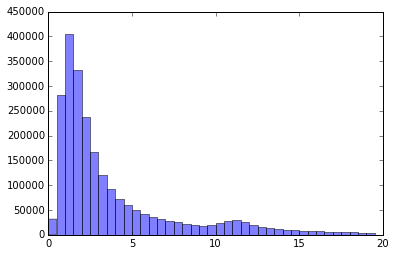

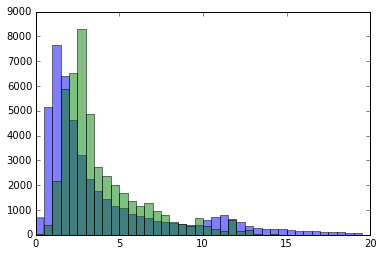

In [13]:
bins = np.arange(0, 20,0.5)

predicted_val_data = model.predict(val_data)

plt.figure()
plt.hist(val_data['ADLOADINGTIME'],  bins=bins,alpha=0.5)
plt.hist(predicted_val_data,  bins=bins,alpha=0.5)

### absolute error wtih respect to ADLOADINGTIME

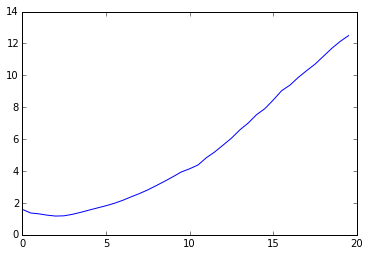

In [48]:
test_data = val_data
test_data_predict = model.predict(test_data)
pred_error = np.abs(test_data['ADLOADINGTIME']-test_data_predict)

[histvals, histbins] = np.histogram(test_data['ADLOADINGTIME'], bins=np.arange(0, np.ceil(max(test_data['ADLOADINGTIME'])),0.5))
minToBin = histbins-np.tile(np.array(test_data['ADLOADINGTIME']),(len(histbins),1)).transpose()
minToBinIdx = np.argmin(np.abs(minToBin),axis=1)

pred_error_loc = np.zeros_like(histbins)
pred_error_loc_n = np.zeros_like(histbins)
for i in range(len(minToBinIdx)):
    pred_error_loc[minToBinIdx[i]] += pred_error[i]
    pred_error_loc_n[minToBinIdx[i]] += 1
    
plt.plot(histbins, pred_error_loc/pred_error_loc_n)

#Save model

In [14]:
savePath = 'E:/celtraMiningFrik/'
model.save(savePath + modelName)